#**INFERENTIAL STATISTICS PROJECT**


##**Import Libraries**:

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
from scipy.stats import levene, shapiro
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.multicomp import pairwise_tukeyhsd

**PROBLEM 2**

**2.1 What proportion of the gunny bags have a breaking strength of less than 3.17 kg per sq cm?**

Proportion of gunny bags with strength less than 3.17 kg/sq cm: 0.1112


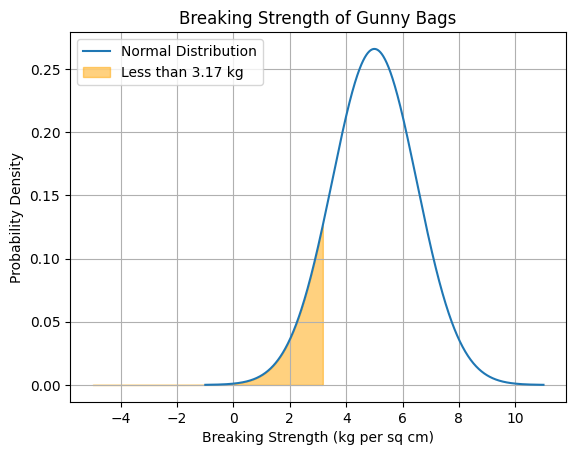

In [64]:
mean = 5
std_dev = 1.5

# Z-score calculation
z_3_17 = (3.17 - mean) / std_dev

# Proportion calculation using CDF (Cumulative Distribution Function)
proportion_3_17 = stats.norm.cdf(z_3_17)
print(f"Proportion of gunny bags with strength less than 3.17 kg/sq cm: {proportion_3_17:.4f}")
# Plotting the distribution
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
y = stats.norm.pdf(x, mean, std_dev)
plt.plot(x, y, label='Normal Distribution')
x_fill = np.linspace(-5, 3.17, 1000)
y_fill = stats.norm.pdf(x_fill, mean, std_dev)
plt.fill_between(x_fill, y_fill, color='orange', alpha=0.5, label='Less than 3.17 kg')
plt.title('Breaking Strength of Gunny Bags')
plt.xlabel('Breaking Strength (kg per sq cm)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

**2.2 What proportion of the gunny bags have a breaking strength of at least 3.6 kg per sq cm.?**

Proportion of gunny bags with strength at least 3.6 kg/sq cm: 0.8247


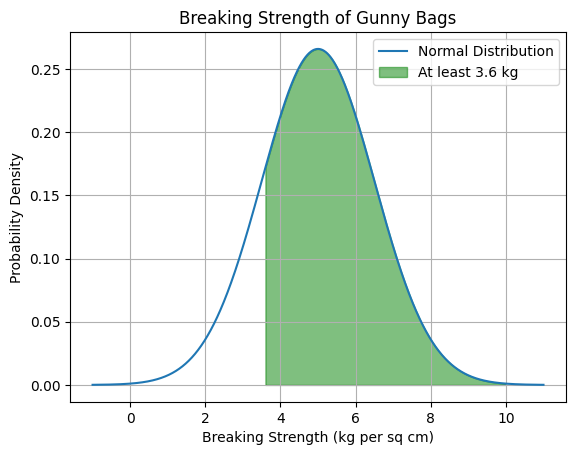

In [65]:
# Z-score calculation for 3.6
z_3_6 = (3.6 - mean) / std_dev
# Proportion calculation using CDF and subtracting from 1
proportion_3_6 = 1 - stats.norm.cdf(z_3_6)
print(f"Proportion of gunny bags with strength at least 3.6 kg/sq cm: {proportion_3_6:.4f}")
# Plotting the distribution
plt.plot(x, y, label='Normal Distribution')
x_fill = np.linspace(3.6, 10, 1000)
y_fill = stats.norm.pdf(x_fill, mean, std_dev)
plt.fill_between(x_fill, y_fill, color='green', alpha=0.5, label='At least 3.6 kg')
plt.title('Breaking Strength of Gunny Bags')
plt.xlabel('Breaking Strength (kg per sq cm)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


**2.3 What proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm.?**

Proportion of gunny bags with strength between 5 and 5.5 kg/sq cm: 0.1306


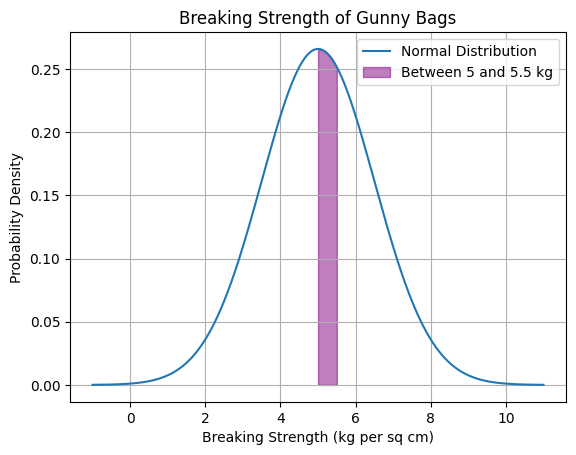

In [66]:
# Z-score calculations
z_5 = (5 - mean) / std_dev
z_5_5 = (5.5 - mean) / std_dev
# Proportion calculation using CDF
proportion_5 = stats.norm.cdf(z_5)
proportion_5_5 = stats.norm.cdf(z_5_5)
proportion_between = proportion_5_5 - proportion_5
print(f"Proportion of gunny bags with strength between 5 and 5.5 kg/sq cm: {proportion_between:.4f}")
# Plotting the distribution
plt.plot(x, y, label='Normal Distribution')
x_fill = np.linspace(5, 5.5, 1000)
y_fill = stats.norm.pdf(x_fill, mean, std_dev)
plt.fill_between(x_fill, y_fill, color='purple', alpha=0.5, label='Between 5 and 5.5 kg')
plt.title('Breaking Strength of Gunny Bags')
plt.xlabel('Breaking Strength (kg per sq cm)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


**2.4 What proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm.?**

Proportion of gunny bags with strength NOT between 3 and 7.5 kg/sq cm: 0.1390


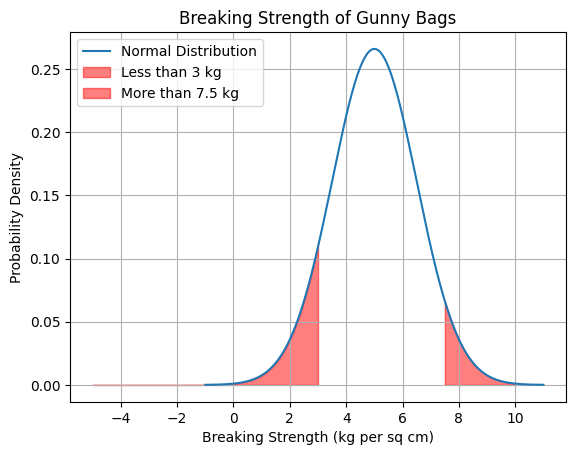

In [67]:
# Z-score calculations
z_3 = (3 - mean) / std_dev
z_7_5 = (7.5 - mean) / std_dev
# Proportion calculation using CDF
proportion_3 = stats.norm.cdf(z_3)
proportion_7_5 = stats.norm.cdf(z_7_5)
proportion_between = proportion_7_5 - proportion_3
proportion_not_between = 1 - proportion_between
print(f"Proportion of gunny bags with strength NOT between 3 and 7.5 kg/sq cm: {proportion_not_between:.4f}")
# Plotting the distribution
plt.plot(x, y, label='Normal Distribution')
x_fill_low = np.linspace(-5, 3, 1000)
y_fill_low = stats.norm.pdf(x_fill_low, mean, std_dev)
x_fill_high = np.linspace(7.5, 10, 1000)
y_fill_high = stats.norm.pdf(x_fill_high, mean, std_dev)
plt.fill_between(x_fill_low, y_fill_low, color='red', alpha=0.5, label='Less than 3 kg')
plt.fill_between(x_fill_high, y_fill_high, color='red', alpha=0.5, label='More than 7.5 kg')
plt.title('Breaking Strength of Gunny Bags')
plt.xlabel('Breaking Strength (kg per sq cm)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


**PROBLEM 3**

In [68]:
data = pd.read_csv('/content/Zingaro_Company.csv')
data.head()

,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771
2,129.861048,159.665201
3,159.096184,145.663528
4,135.256748,136.789227


In [69]:
print(data.isnull().sum())
print(data.duplicated().sum())

Unpolished              0
Treated and Polished    0
dtype: int64
0


3.1 Zingaro has reason to believe that the unpolished stones may not be suitable for printing. Do you think Zingaro is justified in thinking so?

Null Hypothesis (H₀): The mean Brinell's hardness index of unpolished stones is equal to 150.

𝐻
0
:
𝜇
=
150
H
0
​
 :μ=150
Alternate Hypothesis (H₁): The mean Brinell's hardness index of unpolished stones is less than 150.

𝐻
1
:
𝜇
<
150
H
1
​
 :μ<150

In [70]:
unpolished_hardness = data['Unpolished ']
# Perform the one-sample t-test
t_stat_unpolished, p_value_unpolished = stats.ttest_1samp(unpolished_hardness, 150)
print(f"t-statistic: {t_stat_unpolished:.4f}, p-value: {p_value_unpolished:.4f}")
# Since we're testing for the mean being less than 150, we divide the p-value by 2
if p_value_unpolished / 2 < 0.05 and t_stat_unpolished < 0:
    print("Reject the null hypothesis: The mean hardness of unpolished stones is significantly less than 150.")
else:
    print("Fail to reject the null hypothesis: The mean hardness of unpolished stones is not significantly different from 150.")

t-statistic: -4.1646, p-value: 0.0001
Reject the null hypothesis: The mean hardness of unpolished stones is significantly less than 150.


t-statistic: The t-statistic tells you how far your sample mean is from the population mean (150) in units of standard error.
p-value: The p-value helps you determine the significance of your results. Since we're testing whether the mean is less than 150, the p-value should be divided by 2 for a one-tailed test.

3.2 Is the mean hardness of the polished and unpolished stones the same?

Null Hypothesis (H₀): The mean hardness of polished stones is equal to the mean hardness of unpolished stones.

𝐻
0
:
𝜇
polished
=
𝜇
unpolished
H
0
​
 :μ
polished
​
 =μ
unpolished
​

Alternate Hypothesis (H₁): The mean hardness of polished stones is different from the mean hardness of unpolished stones.

𝐻
1
:
𝜇
polished
≠
𝜇
unpolished
H
1
​
 :μ
polished
​


=μ
unpolished
​


In [71]:
polished_hardness = data['Treated and Polished']
unpolished_hardness = data['Unpolished ']
# Perform the independent two-sample t-test
t_stat_compare, p_value_compare = stats.ttest_ind(unpolished_hardness, polished_hardness)
print(f"t-statistic: {t_stat_compare:.4f}, p-value: {p_value_compare:.4f}")
# Check the p-value to determine significance
if p_value_compare < 0.05:
    print("Reject the null hypothesis: The mean hardness of polished and unpolished stones is significantly different.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean hardness between polished and unpolished stones.")

t-statistic: -3.2422, p-value: 0.0015
Reject the null hypothesis: The mean hardness of polished and unpolished stones is significantly different.


statistic: This value tells you how many standard deviations the difference in sample means is from the null hypothesis of no difference.
p-value: This value will indicate whether the difference between the two groups is statistically significant.

PROBLEM 4

4.1 How does the hardness of implants vary depending on dentists?

In [72]:
# Load the data
data = pd.read_excel('/content/Dental+Hardness+data.xlsx')

First few rows of the data:
   Dentist  Method  Alloy  Temp  Response
0        1       1      1  1500       813
1        1       1      1  1600       792
2        1       1      1  1700       792
3        1       1      2  1500       907
4        1       1      2  1600       792

Column names and data types:
Dentist     int64
Method      int64
Alloy       int64
Temp        int64
Response    int64
dtype: object

Summary statistics:
         Dentist     Method      Alloy         Temp     Response
count  90.000000  90.000000  90.000000    90.000000    90.000000
mean    3.000000   2.000000   1.500000  1600.000000   741.777778
std     1.422136   0.821071   0.502801    82.107083   145.767845
min     1.000000   1.000000   1.000000  1500.000000   289.000000
25%     2.000000   1.000000   1.000000  1500.000000   698.000000
50%     3.000000   2.000000   1.500000  1600.000000   767.000000
75%     4.000000   3.000000   2.000000  1700.000000   824.000000
max     5.000000   3.000000   2.000000  1700.

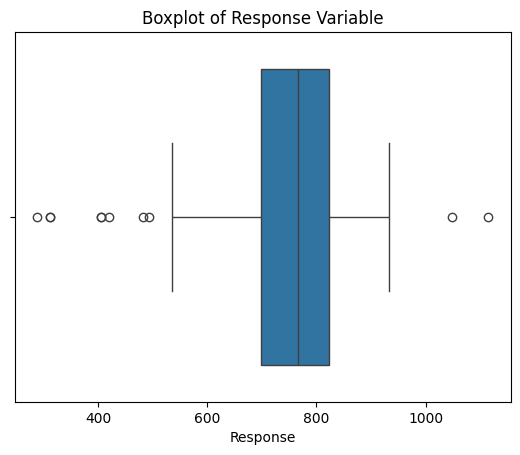


Data after preprocessing:
<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 0 to 87
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Dentist   80 non-null     category
 1   Method    80 non-null     category
 2   Alloy     80 non-null     category
 3   Temp      80 non-null     int64   
 4   Response  80 non-null     int64   
dtypes: category(3), int64(2)
memory usage: 2.6 KB
None


In [73]:
print("First few rows of the data:")
print(data.head())
print("\nColumn names and data types:")
print(data.dtypes)
print("\nSummary statistics:")
print(data.describe())
#Handle missing values
print("\nChecking for missing values:")
print(data.isnull().sum())
#Convert data types
data['Dentist'] = data['Dentist'].astype('category')
data['Method'] = data['Method'].astype('category')
data['Alloy'] = data['Alloy'].astype('category')
# Detect and handle outliers (if necessary)
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=data['Response'])
plt.title('Boxplot of Response Variable')
plt.show()
Q1 = data['Response'].quantile(0.25)
Q3 = data['Response'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['Response'] >= lower_bound) & (data['Response'] <= upper_bound)]
#Subset the data by alloy
alloy_1_data = data[data['Alloy'] == 1]
alloy_2_data = data[data['Alloy'] == 2]
print("\nData after preprocessing:")
print(data.info())


In [74]:
def perform_anova(alloy_data, factor):
    model = ols(f'Response ~ C({factor})', data=alloy_data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    return anova_table
# Alloy 1 Analysis
anova_alloy_1_dentist = perform_anova(alloy_1_data, 'Dentist')
anova_alloy_1_method = perform_anova(alloy_1_data, 'Method')
# Alloy 2 Analysis
anova_alloy_2_dentist = perform_anova(alloy_2_data, 'Dentist')
anova_alloy_2_method = perform_anova(alloy_2_data, 'Method')
print("Alloy 1 - Dentist ANOVA:")
print(anova_alloy_1_dentist)
print("\nAlloy 1 - Method ANOVA:")
print(anova_alloy_1_method)
print("\nAlloy 2 - Dentist ANOVA:")
print(anova_alloy_2_dentist)
print("\nAlloy 2 - Method ANOVA:")
print(anova_alloy_2_method)



Alloy 1 - Dentist ANOVA:
              sum_sq    df         F    PR(>F)
C(Dentist)   14633.1   4.0  0.953882  0.444837
Residual    134230.0  35.0       NaN       NaN

Alloy 1 - Method ANOVA:
                  sum_sq    df         F    PR(>F)
C(Method)    2622.966667   2.0  0.331816  0.719732
Residual   146240.133333  37.0       NaN       NaN

Alloy 2 - Dentist ANOVA:
                   sum_sq    df         F   PR(>F)
C(Dentist)    6954.211111   4.0  0.167641  0.95342
Residual    362973.763889  35.0       NaN      NaN

Alloy 2 - Method ANOVA:
                  sum_sq    df          F    PR(>F)
C(Method)  156172.772619   2.0  13.516379  0.000039
Residual   213755.202381  37.0        NaN       NaN


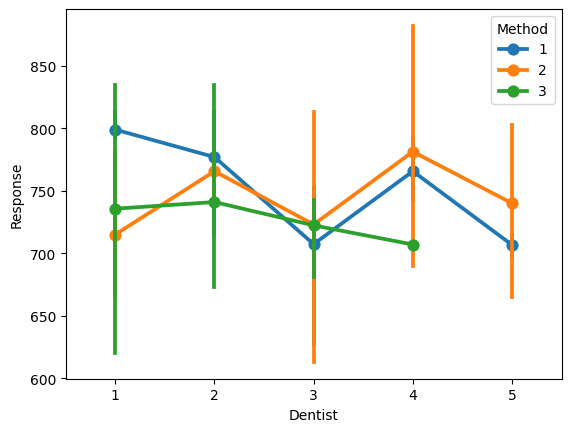

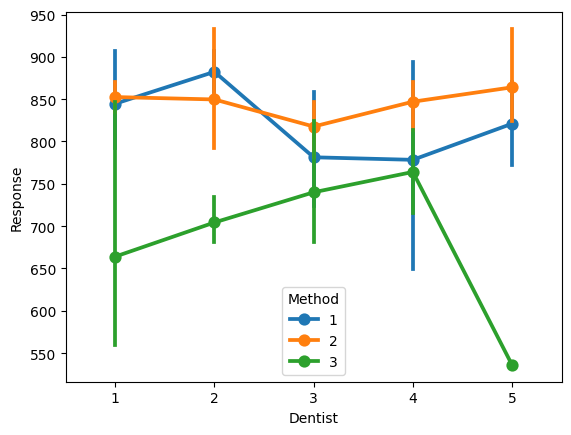

In [75]:
# Interaction Plot for Alloy 1
sns.pointplot(x=alloy_1_data['Dentist'], y=alloy_1_data['Response'], hue=alloy_1_data['Method'])
plt.show()
# Interaction Plot for Alloy 2
sns.pointplot(x=alloy_2_data['Dentist'], y=alloy_2_data['Response'], hue=alloy_2_data['Method'])
plt.show()

4.2 How does the hardness of implants vary depending on methods?

In [76]:
def perform_anova(alloy_data, factor):
    model = ols(f'Response ~ C({factor})', data=alloy_data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    return anova_table, model
# Alloy 1 - Method ANOVA
anova_alloy_1_method, model_alloy_1 = perform_anova(alloy_1_data, 'Method')
anova_alloy_1_method
# Alloy 2 - Method ANOVA
anova_alloy_2_method, model_alloy_2 = perform_anova(alloy_2_data, 'Method')
anova_alloy_2_method
levene_stat, p_levene = levene(alloy_1_data['Response'], alloy_1_data['Method'])
print(f'Levene’s test for Alloy 1: p-value = {p_levene}')
levene_stat, p_levene = levene(alloy_2_data['Response'], alloy_2_data['Method'])
print(f'Levene’s test for Alloy 2: p-value = {p_levene}')
shapiro_stat, p_shapiro_1 = shapiro(model_alloy_1.resid)
print(f'Shapiro-Wilk test for Alloy 1: p-value = {p_shapiro_1}')
shapiro_stat, p_shapiro_2 = shapiro(model_alloy_2.resid)
print(f'Shapiro-Wilk test for Alloy 2: p-value = {p_shapiro_2}')
print("ANOVA results for Alloy 1:")
print(anova_alloy_1_method)
print("\nANOVA results for Alloy 2:")
print(anova_alloy_2_method)

Levene’s test for Alloy 1: p-value = 7.3650690498336e-12
Levene’s test for Alloy 2: p-value = 1.3445468963294088e-08
Shapiro-Wilk test for Alloy 1: p-value = 0.8959227630389344
Shapiro-Wilk test for Alloy 2: p-value = 0.5195359430837676
ANOVA results for Alloy 1:
                  sum_sq    df         F    PR(>F)
C(Method)    2622.966667   2.0  0.331816  0.719732
Residual   146240.133333  37.0       NaN       NaN

ANOVA results for Alloy 2:
                  sum_sq    df          F    PR(>F)
C(Method)  156172.772619   2.0  13.516379  0.000039
Residual   213755.202381  37.0        NaN       NaN


Check the p-values from the ANOVA test:

If the p-value is < 0.05, you reject the null hypothesis, meaning the method significantly impacts implant hardness for that alloy type.
If the p-value is > 0.05, you fail to reject the null hypothesis, meaning there is no significant impact of the method on implant hardness.

4.3 What is the interaction effect between the dentist and method on the hardness of dental implants for each type of alloy?

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/factorplots.py:113: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_data = data.groupby(['trace', 'x']).aggregate(func).reset_index()
/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/factorplots.py:131: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for i, (values, group) in enumerate(plot_data.groupby('trace')):


<Figure size 1000x600 with 0 Axes>

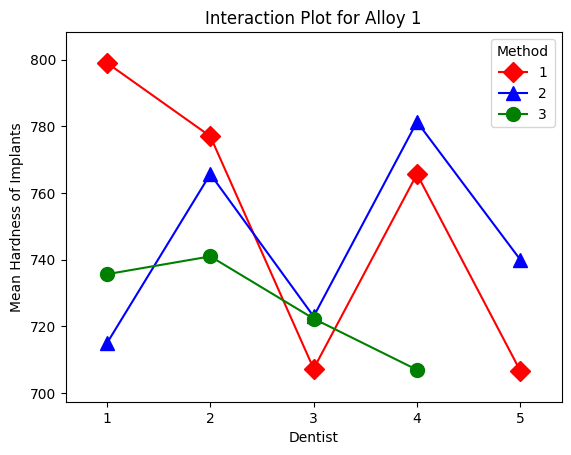

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/factorplots.py:113: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_data = data.groupby(['trace', 'x']).aggregate(func).reset_index()
/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/factorplots.py:131: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for i, (values, group) in enumerate(plot_data.groupby('trace')):


<Figure size 1000x600 with 0 Axes>

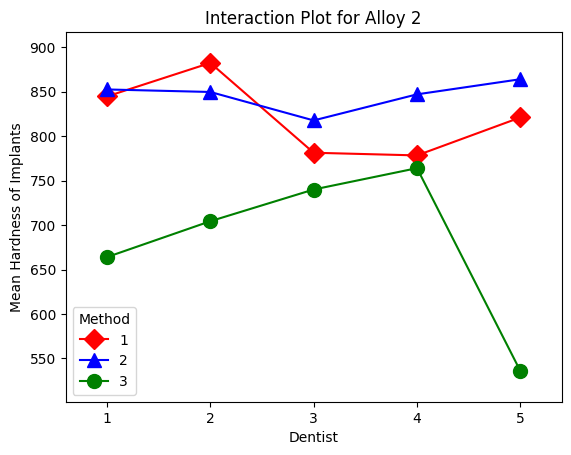

In [77]:
# For Alloy 1
plt.figure(figsize=(10, 6))
interaction_plot(alloy_1_data['Dentist'], alloy_1_data['Method'], alloy_1_data['Response'],
                 colors=['red', 'blue', 'green'], markers=['D', '^', 'o'], ms=10)
plt.title('Interaction Plot for Alloy 1')
plt.xlabel('Dentist')
plt.ylabel('Mean Hardness of Implants')
plt.show()
# For Alloy 2
plt.figure(figsize=(10, 6))
# Convert 'Dentist' column to a list for indexing
interaction_plot(list(alloy_2_data['Dentist']), alloy_2_data['Method'], alloy_2_data['Response'],
                 colors=['red', 'blue', 'green'], markers=['D', '^', 'o'], ms=10)
plt.title('Interaction Plot for Alloy 2')
plt.xlabel('Dentist')
plt.ylabel('Mean Hardness of Implants')
plt.show()

4.4 How does the hardness of implants vary depending on dentists and methods together?

In [78]:
model_alloy1 = ols('Response ~ C(Dentist) * C(Method)', data=alloy_1_data).fit()
anova_table_alloy1 = sm.stats.anova_lm(model_alloy1, typ=2)
print("ANOVA Table for Alloy 1:")
print(anova_table_alloy1)

ANOVA Table for Alloy 1:
                             sum_sq    df         F    PR(>F)
C(Dentist)             14605.557565   4.0  0.829813  0.489550
C(Method)                  1.567584   2.0  0.000178  0.989453
C(Dentist):C(Method)   18780.133333   8.0  0.533495  0.801115
Residual              114406.666667  26.0       NaN       NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 7
  warnings.warn('covariance of constraints does not have full '


In [79]:
model_alloy2 = ols('Response ~ C(Dentist) * C(Method)', data=alloy_2_data).fit()
anova_table_alloy2 = sm.stats.anova_lm(model_alloy2, typ=2)
print("ANOVA Table for Alloy 2:")
print(anova_table_alloy2)

ANOVA Table for Alloy 2:
                             sum_sq    df          F    PR(>F)
C(Dentist)              7746.458120   4.0   0.337900  0.849782
C(Method)             156965.019628   2.0  13.693603  0.000096
C(Dentist):C(Method)   62725.577595   8.0   1.368042  0.257991
Residual              143283.166667  25.0        NaN       NaN


In [80]:
# Post-Hoc Test for Alloy 1
if anova_table_alloy1['PR(>F)'][2] < 0.05:
    print("\nPost-Hoc Test (Tukey's HSD) for Alloy 1:")
    tukey_alloy1 = pairwise_tukeyhsd(endog=alloy_1_data['Response'],
                                      groups=alloy_1_data['Dentist'].astype(str) + '-' + alloy_1_data['Method'].astype(str),
                                      alpha=0.05)
    print(tukey_alloy1)
else:
    print("No significant interaction effect for Alloy 1.")

# Post-Hoc Test for Alloy 2
if anova_table_alloy2['PR(>F)'][2] < 0.05:
    print("\nPost-Hoc Test (Tukey's HSD) for Alloy 2:")
    tukey_alloy2 = pairwise_tukeyhsd(endog=alloy_2_data['Response'],
                                      groups=alloy_2_data['Dentist'].astype(str) + '-' + alloy_2_data['Method'].astype(str),
                                      alpha=0.05)
    print(tukey_alloy2)
else:
    print("No significant interaction effect for Alloy 2.")

No significant interaction effect for Alloy 1.
No significant interaction effect for Alloy 2.


<ipython-input-80-889c264164b1>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table_alloy1['PR(>F)'][2] < 0.05:
<ipython-input-80-889c264164b1>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table_alloy2['PR(>F)'][2] < 0.05:


ANOVA Results:

Check the PR(>F) values from the ANOVA tables. If the p-value for the interaction term (C(Dentist):C(Method)) is less than 0.05, the interaction is significant.
If the interaction is significant, proceed to the post-hoc analysis results to identify which specific combinations of dentists and methods differ.
Post-Hoc Results:

The Tukey's HSD results will provide pairwise comparisons of dentist-method combinations, highlighting which pairs differ significantly in terms of implant hardness.